In [10]:
import requests
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

[List Of Regions](https://findthatpostcode.uk/areatypes/rgn.html)

API To Get GeoJSON: https://findthatpostcode.uk/areas/E14000639.geojson

In [2]:
area_codes = [
    'E12000001', 'E12000002', 'E12000003', 'E12000004', 'E12000005',
    'E12000006', 'E12000007', 'E12000008', 'E12000009', 'E23000005',
]

In [5]:
def fetch_geojson(area_code):
    url = f"https://findthatpostcode.uk/areas/{area_code}.geojson"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"GeoJSON data not found for {area_code}")
        return None

gdf_list = []

In [14]:
for code in area_codes:
    geojson_data = fetch_geojson(code)
    if geojson_data:
        gdf = gpd.GeoDataFrame.from_features(geojson_data["features"])
        gdf["Area Code"] = code
        gdf_list.append(gdf)

gdf_combined = pd.concat(gdf_list, ignore_index=True)

In [17]:
crime_data = pd.DataFrame({
    "Area Code": [ 'E12000001', 'E12000002', 'E12000003', 'E12000004', 'E12000005', 'E12000006', 'E12000007', 'E12000008', 'E12000009'], 
    "Total Crime": [285315, 731817, 590601, 402938, 540973, 453714, 938020, 713628, 402389],
    "Area Name": ['North East', 'North West', 'Yorkshire and The Humber', 'East Midlands', 'West Midlands ', 'East', 'London', 'South East', 'South West']
})
    

In [18]:
merged_gdf = gdf_combined.merge(crime_data, on="Area Code", how="left")

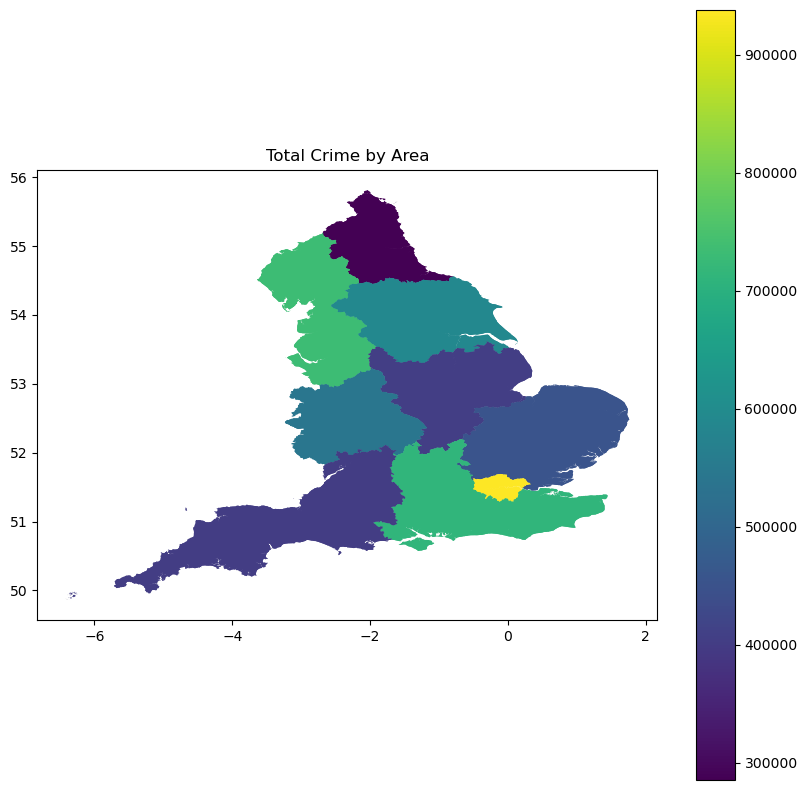

In [19]:
ax = merged_gdf.plot(column='Total Crime', legend=True, figsize=(10, 10))
plt.title('Total Crime by Area')
plt.show()